In [ ]:
#conda install -c conda-forge spacy

In [18]:
import spacy 

In [8]:
import sys
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Pleaseuse the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:

import en_core_web_sm

model = en_core_web_sm.load()

In [3]:
#load model 
#model=spacy.load('en')


In [20]:
# Create a Doc object
doc = model(u'A 12-week intensive training program on Artificial Intelligence and Machine Learning, taught to enthusiasts and prospective data scientist on the startup and corporate level.')

In [21]:
for token in doc :
    print(token.text) #token.pos_ ,pos_token.dep_
    

A
12
-
week
intensive
training
program
on
Artificial
Intelligence
and
Machine
Learning
,
taught
to
enthusiasts
and
prospective
data
scientist
on
the
startup
and
corporate
level
.


In [24]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

A          DET      DT     determiner
12         NUM      CD     cardinal number
-          PUNCT    HYPH   punctuation mark, hyphen
week       NOUN     NN     noun, singular or mass
intensive  ADJ      JJ     adjective
training   NOUN     NN     noun, singular or mass
program    NOUN     NN     noun, singular or mass
on         ADP      IN     conjunction, subordinating or preposition
Artificial PROPN    NNP    noun, proper singular
Intelligence PROPN    NNP    noun, proper singular
and        CCONJ    CC     conjunction, coordinating
Machine    PROPN    NNP    noun, proper singular
Learning   PROPN    NNP    noun, proper singular
,          PUNCT    ,      punctuation mark, comma
taught     VERB     VBD    verb, past tense
to         ADP      IN     conjunction, subordinating or preposition
enthusiasts NOUN     NNS    noun, plural
and        CCONJ    CC     conjunction, coordinating
prospective ADJ      JJ     adjective
data       NOUN     NNS    noun, plural
scientist  NOUN     NN  

In [25]:
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "my_doc" Object is used to create documents with linguistic annotations.
my_doc = model(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['When', 'learning', 'data', 'science', ',', 'you', 'should', "n't", 'get', 'discouraged', '!', '\n', 'Challenges', 'and', 'setbacks', 'are', "n't", 'failures', ',', 'they', "'re", 'just', 'part', 'of', 'the', 'journey', '.', 'You', "'ve", 'got', 'this', '!']


In [26]:
for sent in my_doc.sents:
    print(sent)

When learning data science, you shouldn't get discouraged!

Challenges and setbacks aren't failures, they're just part of the journey.
You've got this!


In [7]:
model.pipeline #shows availabe components in the model pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1f7820cb860>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1f7820fc9a0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1f7820c7160>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1f7820c7460>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1f782174dc0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1f782171d00>)]

In [27]:
model.pipe_names #shows name of components 

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [28]:
doc2=model(u'Alongside the course work, the cohort is presented with realtime case studies that help them better explore the applicability of the curriculum.')

In [30]:
for token in doc2 :
    print(token.pos_) #token.pos_ ,pos_token.dep_

ADP
DET
NOUN
NOUN
PUNCT
DET
NOUN
AUX
VERB
ADP
ADJ
NOUN
NOUN
DET
VERB
PRON
ADV
VERB
DET
NOUN
ADP
DET
NOUN
PUNCT


In [31]:
doc2[0]

Alongside

In [32]:
doc2[0].pos_

'ADP'

In [33]:
spacy.explain('ADP')

'adposition'

In [34]:
doc3 = model(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [35]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [36]:
type(life_quote)

spacy.tokens.span.Span

In [37]:
for sent in doc3.sents:
    print(sent)

Although commmonly attributed to John Lennon from his song "Beautiful Boy", the phrase "Life is what happens to us while we are making other plans" was written by cartoonist Allen Saunders and published in Reader's Digest in 1957, when Lennon was 17.


# Tokenization 

In [39]:
sent1 = '"We\'re moving to L.A.!"'
print(sent1 )

"We're moving to L.A.!"


In [40]:
sent1 =model(sent1 ) 

In [41]:
for token in sent1 :
    print(token.text) #token.pos_ ,pos_token.dep_
    

"
We
're
moving
to
L.A.
!
"


In [42]:
doc2 = model(u"We're here to help! Send your-mail, email addmision@africadataschol.com or visit us at http://www.africadataschool.com! Usd 350")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
your
-
mail
,
email
addmision@africadataschol.com
or
visit
us
at
http://www.africadataschool.com
!
Usd
350


In [43]:
len(doc2)

21

In [46]:
list(doc2)[2:10:2]

[here, help, Send, -]

# Named Entities

In [47]:
doc7 = model(u'Africa Data School is located in Nairobi')

for token in doc7:
    print(token.text, end=' | ')

print('\n----')



Africa | Data | School | is | located | in | Nairobi | 
----


In [28]:
for ent in doc7.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Africa Data School - ORG - Companies, agencies, institutions, etc.
Nairobi - GPE - Countries, cities, states


# Visualizers

In [48]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

In [49]:
displacy.render(doc7, style='ent', jupyter=True)

In [50]:
doc = model(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, Sony sold only 7 thousand Walkman music players.')

displacy.render(doc, style='ent', jupyter=True)

# Steamming 

In [51]:

import nltk

from nltk.stem.porter import *

Playing  -> play
Play  - Play
played -> play

In [53]:
p_stemmer = PorterStemmer()

In [54]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [55]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


In [56]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [57]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [58]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


Stemming has its drawbacks. If given the token saw, stemming might always return saw, whereas lemmatization would likely return either see or saw depending on whether the use of the token was as a verb or a noun. As an example, consider the following:

# Lemmatization 

In [44]:
doc1 = model(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [59]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [60]:
doc2 = model(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON   4690420944186131903    I
saw          VERB   11925638236994514241   see
eighteen     NUM    9609336664675087640    eighteen
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


# Stop words 

In [66]:
print(model.Defaults.stop_words)

{'amount', 're', 'ever', 'show', 'latter', 'per', 'quite', 'over', 'with', 'everywhere', 'anyway', 'wherever', 'yourself', 'being', 'name', 'and', 'this', 'last', 'six', 'keep', 'hundred', 'must', 'becomes', 'a', 'thereafter', 'make', 'moreover', 'which', 'what', 'who', 'latterly', 'empty', 'became', 'those', 'once', 'often', 'nothing', 'we', 'were', 'while', 'do', 'ten', 'first', 'whoever', 'just', 'alone', 'thence', 'these', 'seemed', 'upon', 'third', 'within', 'still', 'anything', 'other', 'various', 'whereafter', 'almost', 'twelve', 'five', 'full', 'otherwise', 'whether', 'in', 'either', 'whose', 'beforehand', 'get', 'towards', '‘re', 'beyond', '‘s', 'much', 'own', 'enough', 'but', 'very', 'never', 'mostly', 'further', 'regarding', 'yet', 'all', 'anyone', 'forty', 'bottom', 'hereupon', 'due', 'or', 'will', 'along', 'besides', 'under', 'was', 'would', 'one', 'used', 'am', 'into', 'whither', 'else', 'hence', 'us', 'fifteen', 'you', 'so', 'become', 'whole', '’re', 'please', 'therein',

In [62]:
len(model.Defaults.stop_words)

326

In [64]:
# check  if is a stop  word 
model.vocab['school'].is_stop

False

In [67]:
# add new stop word 
# Add the word to the set of stop words. Use lowercase!
model.Defaults.stop_words.add('niajewasee')

# Set the stop_word tag on the lexeme
model.vocab['niajewasee'].is_stop = True

In [68]:
len(model.Defaults.stop_words)

327

In [69]:
# Remove the word from the set of stop words
model.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
model.vocab['beyond'].is_stop = False

In [71]:
model.vocab['beyond'].is_stop

False

# Practical exercise ( Text spam )

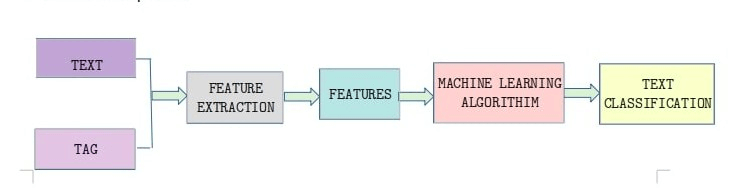

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/smsspamcollection.tsv', sep='\t')
df.head()

label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2

In [73]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [75]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

### Scikit-learn's CountVectorizer
* Text preprocessing, tokenizing and the ability to filter out stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

Let us consider a few sample texts from a document (each as a list element):

document = [ “One Geek helps Two Geeks”, “Two Geeks help Four Geeks”, “Each Geek helps many other Geeks at GeeksforGeeks.”]


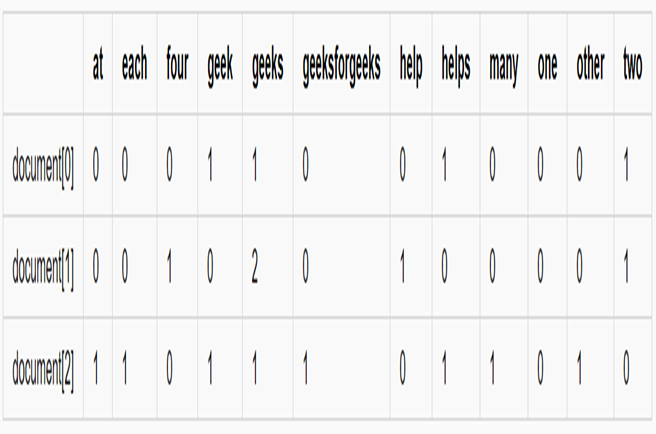

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [83]:
pd.DataFrame(X_train_counts)

0
0          (0, 7069)\t1\n  (0, 4415)\t1\n  (0, 1736)\t1
1       (0, 5512)\t1\n  (0, 4270)\t1\n  (0, 5443)\t1...
2       (0, 3621)\t1\n  (0, 4959)\t1\n  (0, 4583)\t1...
3       (0, 4470)\t1\n  (0, 6219)\t1\n  (0, 3436)\t1...
4       (0, 6330)\t1\n  (0, 7048)\t1\n  (0, 996)\t1\...
...                                                 ...
3728    (0, 3280)\t1\n  (0, 7048)\t1\n  (0, 2926)\t1...
3729    (0, 1454)\t1\n  (0, 5795)\t1\n  (0, 3794)\t1...
3730    (0, 5141)\t1\n  (0, 3085)\t1\n  (0, 2743)\t1...
3731    (0, 6345)\t1\n  (0, 4429)\t1\n  (0, 5520)\t1...
3732    (0, 3416)\t1\n  (0, 3532)\t1\n  (0, 2090)\t1...

[3733 rows x 1 columns]

In [9]:
#Downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

# This downscaling is called **tf–idf** for “Term Frequency times Inverse Document Frequency”.

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [84]:
pd.DataFrame(X_train_tfidf)

0
0       (0, 1736)\t0.7135046738275388\n  (0, 4415)\t...
1       (0, 4519)\t0.19824007486838768\n  (0, 2472)\...
2       (0, 3966)\t0.5639269003584342\n  (0, 4583)\t...
3       (0, 3428)\t0.1858485451167414\n  (0, 3283)\t...
4       (0, 4494)\t0.373989229910788\n  (0, 4426)\t0...
...                                                 ...
3728    (0, 3769)\t0.38384193330670713\n  (0, 2287)\...
3729    (0, 3674)\t0.5570538854722596\n  (0, 3794)\t...
3730    (0, 5799)\t0.4462201431807085\n  (0, 5800)\t...
3731    (0, 3505)\t0.5513460155811831\n  (0, 5520)\t...
3732    (0, 4285)\t0.5025929271884622\n  (0, 5763)\t...

[3733 rows x 1 columns]

### TfidVectorizer

* Combine the CountVectorizer and TfidTransformer steps into one using TfidVectorizer:

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

# Modelling 

In [86]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC()

# Pipeline

In [87]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [88]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [89]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [90]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [91]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037
